In [1]:
from datetime import datetime as dt
import os 
import pandas as pd
import numpy as np

# Duomenų šaltinis https://data.gov.lt/datasets/1828/#resources
data_files=['2021-I_kiti','2021-I_ŠPAM','2021-I_VKK','2021-II_kiti','2021-II_ŠPAM','2021-II_VKK']
data_dir="../../../duomenys/data_gov_lt/elektra" # atsisiųsti failai
data_dir_git="./el_vartotojai_2021_stats" # konvertuoti csv saugomi čia pat
data_file_ext="csv" # extention

print('Pasiruošta',dt.now().replace(microsecond=0))
print(os.getcwd())

file_list = os.listdir(data_dir_git)
# Print elements containing 'abc', one per line
for file in file_list:
    if 'utf' in file:
        print(file)

# c:\Users\Eridas\Documents\vilniuscoding2024\git\DataScienceNotebooks\Studentai\MykolasOK
# /home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK

Pasiruošta 2025-01-24 18:35:39
/home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK
2021-II_kiti_utf-8.csv
2021-II_ŠPAM_utf-8.csv
2021-II_VKK_utf-8.csv
2021-I_kiti_utf-8.csv
2021-I_ŠPAM_utf-8.csv
2021-I_VKK_utf-8.csv


In [3]:
print("Duomenys iš failų įkeliami į 'df_dict={}'. ",dt.now().replace(microsecond=0))

df_dict={}

for file in data_files:
    print(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',end=' ')
    df = pd.read_csv(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',sep=',',low_memory=False)
    # ,sep=r'[;,]',engine='python'
    print(f'>>> {df.shape} (eil. x stulp.)')
    
    df_dict[file]=df

# print('+'*50)

Duomenys iš failų įkeliami į 'df_dict={}'.  2025-01-24 18:36:04
./el_vartotojai_2021_stats/2021-I_kiti_utf-8.csv >>> (1048575, 11) (eil. x stulp.)
./el_vartotojai_2021_stats/2021-I_ŠPAM_utf-8.csv >>> (271444, 11) (eil. x stulp.)
./el_vartotojai_2021_stats/2021-I_VKK_utf-8.csv >>> (1015563, 11) (eil. x stulp.)
./el_vartotojai_2021_stats/2021-II_kiti_utf-8.csv >>> (1048575, 11) (eil. x stulp.)
./el_vartotojai_2021_stats/2021-II_ŠPAM_utf-8.csv >>> (272313, 11) (eil. x stulp.)
./el_vartotojai_2021_stats/2021-II_VKK_utf-8.csv >>> (1024658, 11) (eil. x stulp.)


In [7]:
print(list(df_dict.keys()))
print(list(df_dict['2021-I_kiti'].keys()))
print(list(df_dict['2021-II_kiti'].keys()))

['2021-I_kiti', '2021-I_ŠPAM', '2021-I_VKK', '2021-II_kiti', '2021-II_ŠPAM', '2021-II_VKK']
['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']
['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']


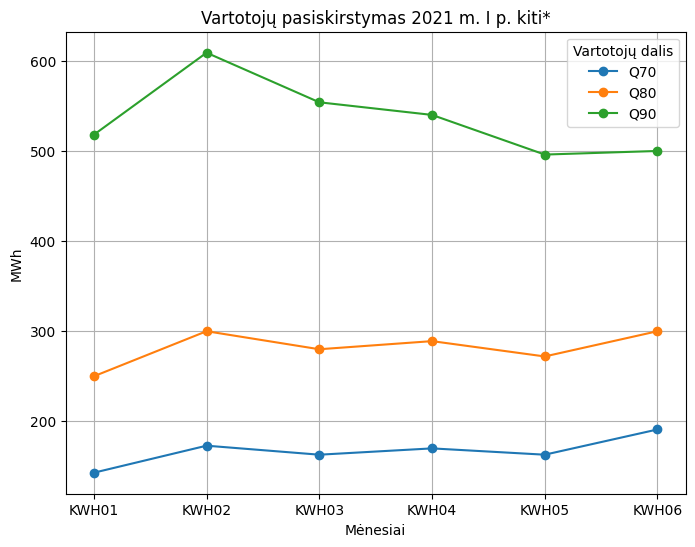

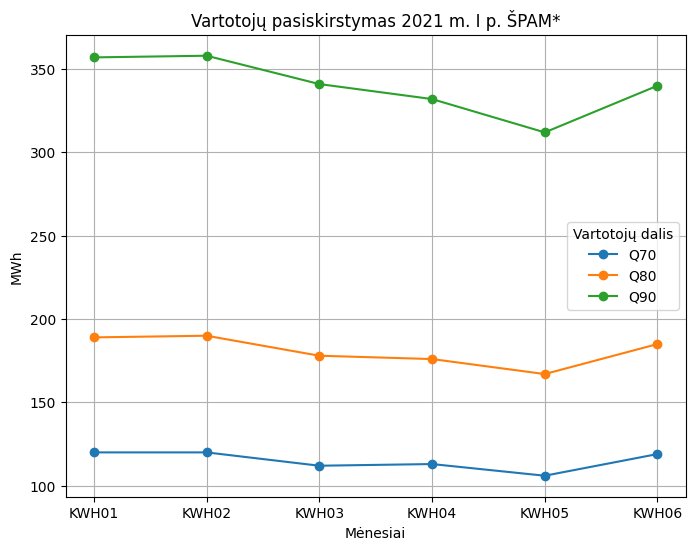

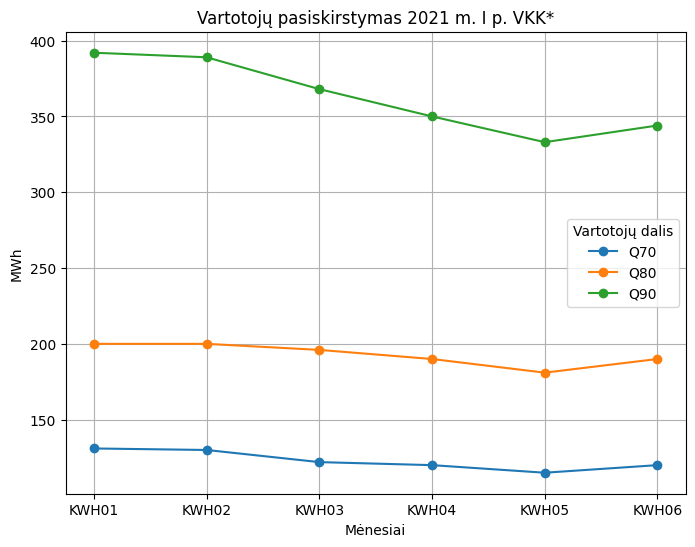

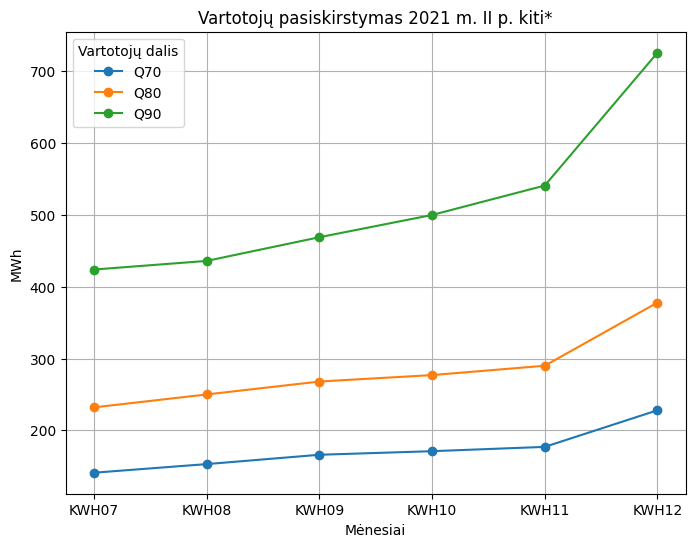

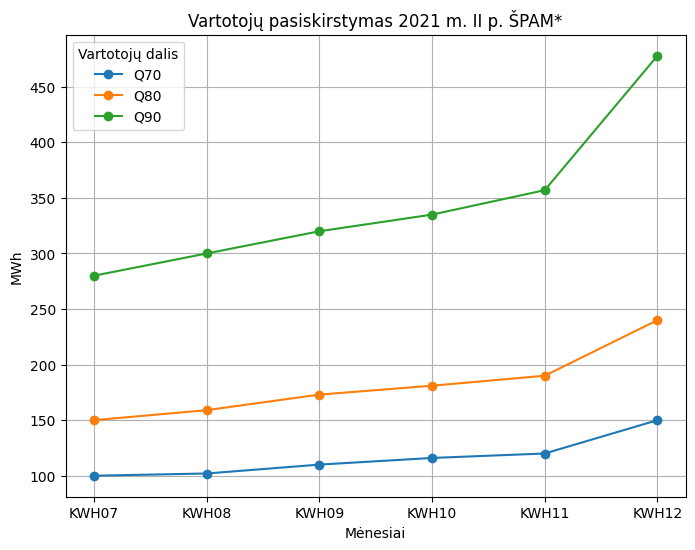

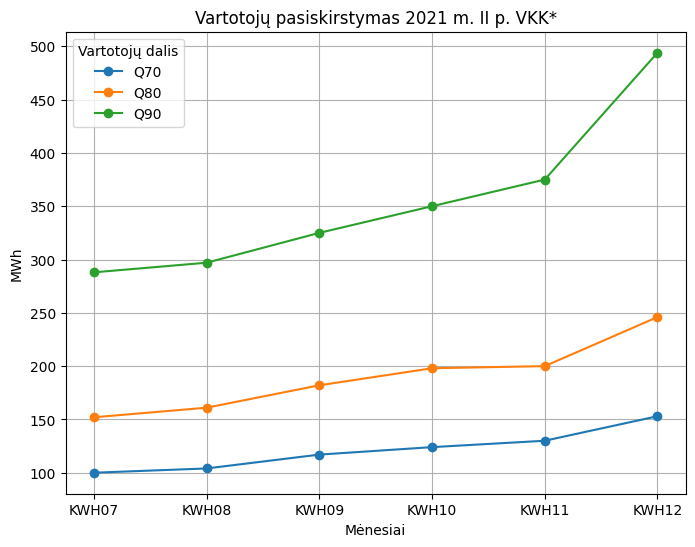

________________________
* Regionų grupių kodai:
  VKK - Vilnius, Kaunas, Klaipėda
  ŠPAM - Šiauliai, Panevėžys, Alytus, Mažeikiai
  kiti - mažiausių Lietuvos regionų vartotojai


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

for name, df in df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KW"
    kw_fields = [col for col in df.columns if col.startswith('KW')]
    
    # Sukuriame duomenų rinkinį tik su KW laukais
    if kw_fields:  # Jei yra tokių laukų
        kw_data = df[kw_fields]
        
        # Nustatome slenksčius
        quantiles = kw_data.quantile([0.7, 0.8, 0.9])
        
        # Nupiešiame grafiką
        plt.figure(figsize=(8, 6))
        for quantile in quantiles.index:
            plt.plot(kw_fields, quantiles.loc[quantile], label=f'Q{int(quantile * 100)}', marker='o')
        
        # Pritaikome grafikui pavadinimą ir ašis
        plt.title(f"Vartotojų pasiskirstymas {name[:4]} m. {name.split('-')[1].split('_')[0]} p. {name.split('-')[1].split('_')[1]}*")
        plt.xlabel("Mėnesiai")
        plt.ylabel("MWh")
        plt.legend(title="Vartotojų dalis")
        plt.grid(True)
        
        # Parodome grafiką
        plt.show()

print('________________________\n* Regionų grupių kodai:')
print('  VKK - Vilnius, Kaunas, Klaipėda')
print('  ŠPAM - Šiauliai, Panevėžys, Alytus, Mažeikiai')
print('  kiti - mažiausių Lietuvos regionų vartotojai')

In [15]:
import re

print(name)
info=re.split(r'[^\w]+', name)
print(info)

print(name.split('-'))
print(name.split('-')[0])
print(name.split('-')[1].split('_')[0])
print(name.split('-')[1].split('_')[1])


2021-II_VKK
['2021', 'II_VKK']
['2021', 'II_VKK']
2021
II
VKK
